# Preliminaries

In [1]:
pip install altair vega_datasets

You should consider upgrading via the '/opt/python/latest/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ipywidgets

You should consider upgrading via the '/opt/python/latest/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import base64
import altair as alt
import ipywidgets as widgets
import IPython.display
from IPython.display import display, clear_output

from PIL import Image
from io import BytesIO
from IPython.display import HTML

In [4]:
pd.set_option('display.max_colwidth', None)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((50, 50), Image.Resampling.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'gif')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/gif;base64,{image_base64(im)}">'

# Codes

In [5]:
df_data2021 = pd.read_csv('../output/data2021.csv')

In [6]:
df = pd.read_csv('../input/codes.csv', engine='python')
df.rename(columns={'alpha-3': 'Country Code ISO3','country-code': 'id'}, inplace=True)
df.loc[df['name'] == 'Namibia', ['alpha-2']] = "NA"
df_codes = pd.merge(df_data2021['Country Code ISO3'].head(193), df[['Country Code ISO3','id','alpha-2']], how="left", on="Country Code ISO3")
df_codes

,Country Code ISO3,id,alpha-2
0,AFG,4,AF
1,AGO,24,AO
2,ALB,8,AL
3,AND,20,AD
4,ARE,784,AE
...,...,...,...
188,WSM,882,WS
189,YEM,887,YE
190,ZAF,710,ZA
191,ZMB,894,ZM


In [7]:
def map_figtn(alpha: str) -> str:
   base_path = 'flags/'
   path = base_path + 'tn_' + str.lower(str(alpha)) + '-flag.gif'
   
   return path

In [8]:
df_codes['file']=df_codes.apply(lambda row: map_figtn(row["alpha-2"]), axis=1)
df_codes['image'] = df_codes.file.map(lambda f: get_thumbnail(f))
df_codes

,Country Code ISO3,id,alpha-2,file,image
0,AFG,4,AF,flags/tn_af-flag.gif,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F246B49FD60>
1,AGO,24,AO,flags/tn_ao-flag.gif,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F2438C867A0>
2,ALB,8,AL,flags/tn_al-flag.gif,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x36 at 0x7F24386EC370>
3,AND,20,AD,flags/tn_ad-flag.gif,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x35 at 0x7F24386ECD90>
4,ARE,784,AE,flags/tn_ae-flag.gif,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x25 at 0x7F24386ECEE0>
...,...,...,...,...,...
188,WSM,882,WS,flags/tn_ws-flag.gif,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x25 at 0x7F2438399ED0>
189,YEM,887,YE,flags/tn_ye-flag.gif,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F2438399FF0>
190,ZAF,710,ZA,flags/tn_za-flag.gif,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x30 at 0x7F243839A110>
191,ZMB,894,ZM,flags/tn_zm-flag.gif,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F243839A230>


# Functions

https://towardsdatascience.com/interactive-data-analysis-with-dropdown-menu-ipywidgets-and-plotly-in-jupyter-notebook-591a84a81b22

In [9]:
list_regions = ["All regions","East and South Asia","Eastern Europe and Central Asia","Latin America and the Caribbean","Middle East and North Africa","OECD Members","Oceania","Sub-Saharan Africa"]
list_region_codes = ["East & South Asia", "Africa", "E. Europe & C. Asia", "LAC", "MENA", "Oceania", "OECD"]
list_incomegroups = ["Low-income Countries", "Lower-middle-income Countries", "Upper-middle-income Countries", "High-income Countries"]
list_income_codes = ["LIC","LMIC","UMIC","HIC"]

In [10]:
def index_by_region(region,df):
    
    df.sort_values(by=['IndexRank'], inplace=True, ignore_index=True)
    if region == "All regions":
        display(HTML(df[['IndexRank', 'image', 'Country', 'IndexScore']][df['IndexRank'] != 0].to_html(formatters={'image': image_formatter}, escape=False, index=False)))
    else:
        display(HTML(df[['IndexRank', 'image', 'Country', 'IndexScore']][(df['IndexRank'] != 0) & (df['Regions used for the SDR'] == region)].to_html(formatters={'image': image_formatter}, escape=False, index=False)))

In [11]:
def calc_average_regions(df, year):

  data = []

  df["WeightedIndex"] = df['IndexScore'] * df['Population']
  weighted_sum = df["WeightedIndex"].sum()
  population_sum = df['Population'].sum()
  average = weighted_sum/population_sum
  data.append(["World", year, average])

  for region in list_region_codes:
    df_i = df.loc[df['Regions used for the SDR'] == region]
    df_i["WeightedIndex"] = df_i['IndexScore'] * df_i['Population']
    weighted_sum = df_i["WeightedIndex"].sum()
    population_sum = df_i['Population'].sum()
    average = weighted_sum/population_sum
    data.append([region, average, year])

  df_o = pd.DataFrame(data, columns=["Region", "IndexScore", "Year"])

  return df_o

In [12]:
def calc_average_income(df, year):

  data = []

  for region in list_income_codes:
    df_i = df.loc[df['IncomeGroup'] == region]
    df_i["WeightedIndex"] = df_i['IndexScore'] * df_i['Population']
    weighted_sum = df_i["WeightedIndex"].sum()
    population_sum = df_i['Population'].sum()
    average = weighted_sum/population_sum
    data.append([region, year, average])

  df_o = pd.DataFrame(data, columns=["IncomeGroup", "IndexScore", "Year"])

  return df_o

In [13]:
def calc_index_spill(df):

  data = []

  for i in range(0,len(list_region_codes)):
    df_i = df.loc[df['Regions used for the SDR'] == list_region_codes[i]]
    df_i["WeightedIndex"] = df_i['IndexScore'] * df_i['Population']
    weighted_sum = df_i["WeightedIndex"].sum()
    population_sum = df_i['Population'].sum()
    index = weighted_sum/population_sum
    df_i["WeightedSpill"] = df_i['SpillScore'] * df_i['Population']
    weighted_sum = df_i["WeightedSpill"].sum()
    population_sum = df_i['Population'].sum()
    spill = weighted_sum/population_sum
    data.append([list_regions[i+1], index, spill])

  for i in range(0,len(list_income_codes)):
    df_i = df.loc[df['IncomeGroup'] == list_income_codes[i]]
    df_i["WeightedIndex"] = df_i['IndexScore'] * df_i['Population']
    weighted_sum = df_i["WeightedIndex"].sum()
    population_sum = df_i['Population'].sum()
    index = weighted_sum/population_sum
    df_i["WeightedSpill"] = df_i['SpillScore'] * df_i['Population']
    weighted_sum = df_i["WeightedSpill"].sum()
    population_sum = df_i['Population'].sum()
    spill = weighted_sum/population_sum
    data.append([list_incomegroups[i], index, spill])

  df_o = pd.DataFrame(data, columns=["Country", "IndexScore", "SpilloverScore"])

  return df_o

# Population

Years prior 2017 and before

In [14]:
df_population = pd.read_csv('../input/API_SP.POP.TOTL_DS2_en_csv_v2_4019998.csv', skiprows = [0,1,2,3])
df_population.rename(columns={'Country Code': 'Country Code ISO3'}, inplace=True)
df_population

,Country Name,Country Code ISO3,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,NaN,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN,NaN


# 2021

In [15]:
df_data2021

,Country Code ISO3,Country,IndexScore,IndexRank,Percentage missing values,SpilloverScore,Regional Score (0-100),Regions used for the SDR,Population,Goal 1 Dash,...,Goal 8 Regional Score,Goal 9 Regional Score,Goal 10 Regional Score,Goal 11 Regional Score,Goal 12 Regional Score,Goal 13 Regional Score,Goal 14 Regional Score,Goal 15 Regional Score,Goal 16 Regional Score,Goal 17 Regional Score
0,AFG,Afghanistan,53.933312,137,9.302326,99.344000,71.402435,E. Europe & C. Asia,38928341.0,grey,...,69.774644,40.058590,72.362762,76.443228,77.629345,83.041913,58.865821,69.499564,72.403938,63.386460
1,AGO,Angola,50.296134,154,0.000000,97.022200,51.926818,Africa,32866268.0,red,...,59.981185,18.239817,37.334205,52.728915,88.024702,96.266527,68.010492,66.835003,56.050983,51.652955
2,ALB,Albania,71.021858,64,3.296703,94.337556,71.402435,E. Europe & C. Asia,2877800.0,yellow,...,69.774644,40.058590,72.362762,76.443228,77.629345,83.041913,58.865821,69.499564,72.403938,63.386460
3,AND,Andorra,NaN,0,51.162791,NaN,71.402435,E. Europe & C. Asia,77265.0,grey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,70.169932,71,10.989011,38.819636,67.100057,MENA,9890400.0,green,...,62.065689,47.493910,66.178091,58.928271,76.842146,71.475510,62.776615,57.356213,69.093831,56.231255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,_Africa,Sub-Saharan Africa,51.926818,0,0.000000,98.358200,NaN,NaN,NaN,red,...,67.798097,45.949896,41.742167,69.375417,79.319403,85.763944,61.556103,59.289644,63.378825,57.346194
201,_LIC,Low-income Countries,50.960623,0,0.000000,99.463100,NaN,NaN,NaN,red,...,67.798097,45.949896,41.742167,69.375417,79.319403,85.763944,61.556103,59.289644,63.378825,57.346194
202,_LMIC,Lower-middle-income Countries,60.051585,0,0.000000,98.624700,NaN,NaN,NaN,orange,...,67.798097,45.949896,41.742167,69.375417,79.319403,85.763944,61.556103,59.289644,63.378825,57.346194
203,_UMIC,Upper-middle-income Countries,70.772890,0,0.000000,94.988400,NaN,NaN,NaN,yellow,...,67.798097,45.949896,41.742167,69.375417,79.319403,85.763944,61.556103,59.289644,63.378825,57.346194


In [16]:
df_sdg_spill2021 = pd.merge(df_data2021[['Country Code ISO3','Country','IndexScore','IndexRank','SpilloverScore','Regions used for the SDR']].head(193), df_codes[['Country Code ISO3','id','image']], how="left", on="Country Code ISO3")
df_sdg_spill2021

,Country Code ISO3,Country,IndexScore,IndexRank,SpilloverScore,Regions used for the SDR,id,image
0,AFG,Afghanistan,53.933312,137,99.344000,E. Europe & C. Asia,4,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F246B49FD60>
1,AGO,Angola,50.296134,154,97.022200,Africa,24,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F2438C867A0>
2,ALB,Albania,71.021858,64,94.337556,E. Europe & C. Asia,8,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x36 at 0x7F24386EC370>
3,AND,Andorra,NaN,0,NaN,E. Europe & C. Asia,20,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x35 at 0x7F24386ECD90>
4,ARE,United Arab Emirates,70.169932,71,38.819636,MENA,784,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x25 at 0x7F24386ECEE0>
...,...,...,...,...,...,...,...,...
188,WSM,Samoa,NaN,0,NaN,Oceania,882,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x25 at 0x7F2438399ED0>
189,YEM,"Yemen, Rep.",52.863291,145,99.023200,MENA,887,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F2438399FF0>
190,ZAF,South Africa,63.741676,107,88.560300,Africa,710,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x30 at 0x7F243839A110>
191,ZMB,Zambia,53.391375,141,98.332000,Africa,894,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F243839A230>


In [17]:
df_sdg_spill2021["Regions used for the SDR"].unique().tolist()

['E. Europe & C. Asia',
 'Africa',
 'MENA',
 'LAC',
 'OECD',
 'East & South Asia',
 'Oceania']

In [18]:
df_sdg_spill2021.to_csv("../output/sdg_spill2021.csv",index=False)

## All regions Index Score

In [19]:
dropdown_indexscore = widgets.Dropdown(
    options=list_regions,
    value=list_regions[0],
    description='Select region:',
    disabled=False,
)

def dropdown_indexscore_eventhandler(change):     

    display(dropdown_indexscore)
    region_choice = change.new
    index_by_region(region_choice)
    IPython.display.clear_output(wait=True)

dropdown_indexscore.observe(dropdown_indexscore_eventhandler, names='value')

display(dropdown_indexscore)
IPython.display.clear_output(wait=True)  

Dropdown(description='Select region:', options=('All regions', 'East and South Asia', 'Eastern Europe and Cent…

IndexRank,image,Country,IndexScore
1,,Finland,85.901163
2,,Sweden,85.613602
3,,Denmark,84.860522
4,,Germany,82.481795
5,,Belgium,82.190174
6,,Austria,82.080087
7,,Norway,81.979123
8,,France,81.672944
9,,Slovenia,81.600967
10,,Estonia,81.575852

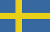
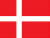
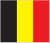
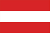
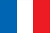
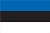
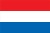
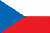
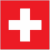
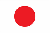
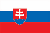
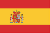
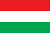
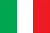
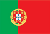
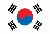
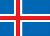
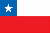
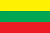
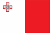
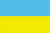
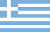
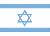
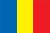
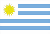
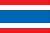
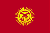
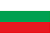
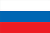
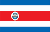
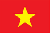
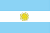
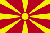
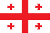
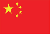
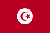
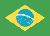
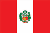
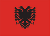
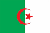
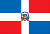
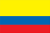
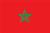
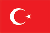
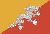
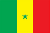
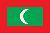
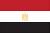
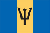
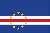
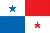
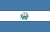
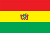
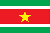
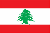
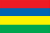
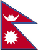
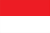
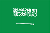
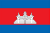
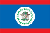
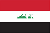
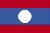
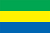
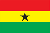
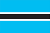
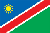
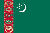
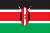
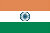
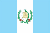
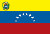
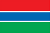
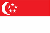
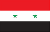
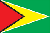
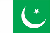
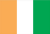
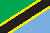
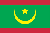
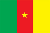
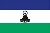
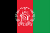
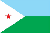
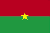
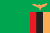
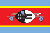
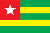
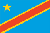
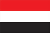
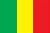
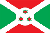
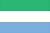
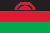
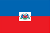
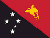
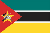
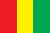
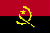
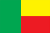
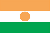
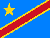
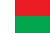
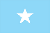
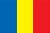
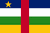

In [20]:
index_by_region("All regions",df_sdg_spill2021)

## All regions Spillover

In [21]:
def spill_by_region(region,df):
    
    df.sort_values(by=['SpilloverScore'], ascending=False, inplace=True)
    df = df.reset_index()
    df['SpilloverRank'] = df.index+1

    if region == "All regions":
        display(HTML(df[['SpilloverRank', 'image', 'Country', 'SpilloverScore']].to_html(formatters={'image': image_formatter}, escape=False, index=False)))
    else:
        display(HTML(df[['SpilloverRank', 'image', 'Country', 'SpilloverScore']][df['Regions used for the SDR'] == region].to_html(formatters={'image': image_formatter}, escape=False, index=False)))

In [22]:
dropdown_spillscore = widgets.Dropdown(
    options=list_regions,
    value=list_regions[0],
    description='Select region:',
    disabled=False,
)

def dropdown_spillscore_eventhandler(change):     

    display(dropdown_spillscore)
    region_choice = change.new
    spill_by_region(region_choice)
    IPython.display.clear_output(wait=True)

dropdown_spillscore.observe(dropdown_spillscore_eventhandler, names='value')

display(dropdown_spillscore)
IPython.display.clear_output(wait=True)  

Dropdown(description='Select region:', options=('All regions', 'East and South Asia', 'Eastern Europe and Cent…

SpilloverRank,image,Country,SpilloverScore
1,,Myanmar,99.986800
2,,Sudan,99.986286
3,,Somalia,99.963444
4,,South Sudan,99.939333
5,,Chad,99.819889
6,,Burundi,99.774778
7,,Moldova,99.741222
8,,Ethiopia,99.722100
9,,Pakistan,99.678200
10,,Central African Republic,99.648444

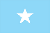
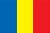
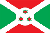
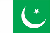
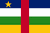
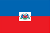
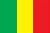
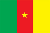
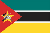
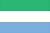
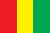
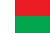
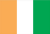
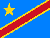
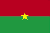
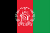
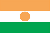
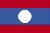
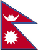
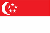
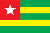
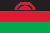
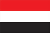
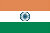
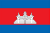
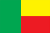
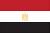
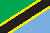
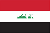
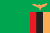
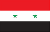
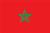
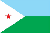
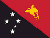
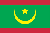
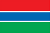
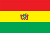
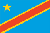
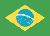
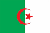
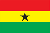
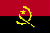
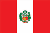
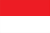
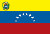
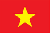
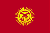
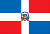
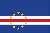
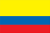
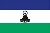
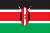
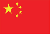
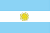
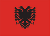
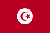
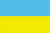
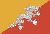
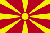
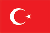
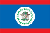
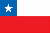
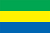
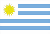
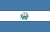
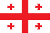
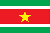
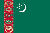
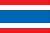
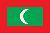
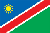
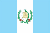
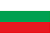
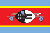
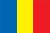
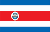
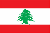
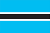
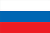
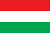
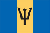
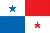
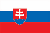
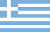
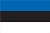
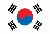
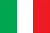
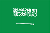
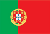
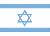
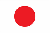
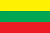
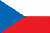
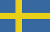
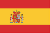
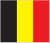
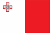
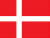
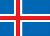
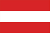
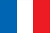
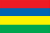
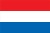
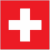
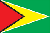
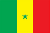
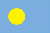
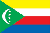
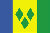
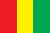
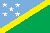
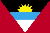
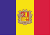
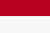
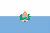
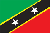
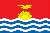
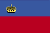

In [23]:
spill_by_region("All regions",df_sdg_spill2021)

## Index Score versus Spillover

In [24]:
df = df_data2021[['IndexScore','Regions used for the SDR','Population']][(df_data2021["IndexScore"].notna()) & (df_data2021["Population"].notna())]

In [25]:
df_average2021 = calc_average_regions(df, 2021)

/tmp/ipykernel_20657/157159297.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i["WeightedIndex"] = df_i['IndexScore'] * df_i['Population']


In [26]:
df_sdg_spillover = df_data2021[["Country", "IndexScore", "SpilloverScore"]][df_data2021["Country Code ISO3"].str.startswith('_')]
df_sdg_spillover

,Country,IndexScore,SpilloverScore
193,Eastern Europe and Central Asia,71.402435,87.611111
194,East and South Asia,65.749204,97.604900
195,Latin America and the Caribbean,68.576154,95.056000
196,Middle East and North Africa,67.100057,93.437300
197,Oceania,50.079087,100.000000
198,OECD members,77.207633,70.072545
199,Small Island Developing States,62.461446,79.222889
200,Sub-Saharan Africa,51.926818,98.358200
201,Low-income Countries,50.960623,99.463100
202,Lower-middle-income Countries,60.051585,98.624700


In [27]:
chartindex = alt.Chart(df_sdg_spillover).mark_bar().encode(
    x=alt.X('IndexScore:Q', scale=alt.Scale(reverse=True)),
    y=alt.Y("Country:N", axis=alt.Axis(orient='right',title='',labels=False))
)

chartspill = alt.Chart(df_sdg_spillover).mark_bar(color='green').encode(
    x='SpilloverScore:Q',
    y=alt.Y("Country:N", axis=alt.Axis(title=''))
)

chart = chartindex | chartspill
chart

alt.HConcatChart(...)

In [28]:
lic = float(df_sdg_spillover["IndexScore"][df_sdg_spillover['Country'] == "Low-income Countries"])
lmic = float(df_sdg_spillover["IndexScore"][df_sdg_spillover['Country'] == "Lower-middle-income Countries"])
umic = float(df_sdg_spillover["IndexScore"][df_sdg_spillover['Country'] == "Upper-middle-income Countries"])
hic = float(df_sdg_spillover["IndexScore"][df_sdg_spillover['Country'] == "High-income Countries"])

df_income2021 = pd.DataFrame({'Income Group': ["LIC","LMIC","UMIC","HIC"],
                     'IndexScore': [lic,lmic,umic,hic],
                     'Year': [2021,2021,2021,2021]})

# 2020

In [29]:
df_data2020 = pd.read_csv('../output/data2020.csv')
df_data2020

,Country,Country Code ISO3,IndexScore,IndexRank,Percentage missing values,SpilloverScore,Regional Score (0-100),Regions used for the SDR,Population,Goal 1 Dash,...,Goal 8 Regional Score,Goal 9 Regional Score,Goal 10 Regional Score,Goal 11 Regional Score,Goal 12 Regional Score,Goal 13 Regional Score,Goal 14 Regional Score,Goal 15 Regional Score,Goal 16 Regional Score,Goal 17 Regional Score
0,Sweden,SWE,84.724063,1,3.571429,67.448900,77.304991,OECD,10099270.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
1,Denmark,DNK,84.558776,2,1.190476,66.420200,77.304991,OECD,5792203.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
2,Finland,FIN,83.772759,3,1.190476,66.645000,77.304991,OECD,5540718.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
3,France,FRA,81.128541,4,1.190476,51.124000,77.304991,OECD,65273512.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
4,Germany,DEU,80.774386,5,1.190476,57.002000,77.304991,OECD,83783945.0,yellow,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,OECD members,_OECD,77.304991,0,1.190476,66.989900,NaN,NaN,NaN,green,...,73.244191,46.329076,52.515273,69.462212,80.378303,87.780833,59.353733,60.347285,63.573379,61.067545
200,Low-income Countries,_LIC,52.468608,0,0.000000,99.396111,NaN,NaN,NaN,red,...,73.244191,46.329076,52.515273,69.462212,80.378303,87.780833,59.353733,60.347285,63.573379,61.067545
201,Lower-middle-income Countries,_LMIC,61.648237,0,0.000000,98.551111,NaN,NaN,NaN,orange,...,73.244191,46.329076,52.515273,69.462212,80.378303,87.780833,59.353733,60.347285,63.573379,61.067545
202,Upper-middle-income Countries,_UMIC,73.240621,0,0.000000,95.155000,NaN,NaN,NaN,yellow,...,73.244191,46.329076,52.515273,69.462212,80.378303,87.780833,59.353733,60.347285,63.573379,61.067545


In [30]:
df_sdg_spill2020 = pd.merge(df_data2020[['Country Code ISO3','Country','IndexScore','IndexRank','SpilloverScore','Regions used for the SDR']].head(193), df_codes[['Country Code ISO3','id','image']], how="left", on="Country Code ISO3")
df_sdg_spill2020

,Country Code ISO3,Country,IndexScore,IndexRank,SpilloverScore,Regions used for the SDR,id,image
0,SWE,Sweden,84.724063,1,67.4489,OECD,752,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x32 at 0x7F24383982B0>
1,DNK,Denmark,84.558776,2,66.4202,OECD,208,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x38 at 0x7F24386EFF70>
2,FIN,Finland,83.772759,3,66.6450,OECD,246,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x31 at 0x7F24385AC9D0>
3,FRA,France,81.128541,4,51.1240,OECD,250,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F24385ACC10>
4,DEU,Germany,80.774386,5,57.0020,OECD,276,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x31 at 0x7F24386EFC10>
...,...,...,...,...,...,...,...,...
188,TLS,Timor-Leste,NaN,0,NaN,East & South Asia,626,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x25 at 0x7F2438398CD0>
189,TON,Tonga,NaN,0,NaN,Oceania,776,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x25 at 0x7F2438398DF0>
190,TUV,Tuvalu,NaN,0,NaN,Oceania,798,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x25 at 0x7F2438399270>
191,VCT,St. Vincent and the Grenadines,NaN,0,NaN,LAC,670,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F2438399A50>


In [31]:
df_sdg_spill2020["Regions used for the SDR"].unique().tolist()

['OECD',
 'E. Europe & C. Asia',
 'LAC',
 'East & South Asia',
 'MENA',
 'Oceania',
 'Africa']

In [32]:
df_sdg_spill2020.to_csv("../output/sdg_spill2020.csv",index=False)

In [33]:
df = df_data2020[['IndexScore','Regions used for the SDR','Population']][(df_data2020["IndexScore"].notna()) & (df_data2020["Population"].notna())]

In [34]:
df_average2020 = calc_average_regions(df, 2020)

/tmp/ipykernel_20657/157159297.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i["WeightedIndex"] = df_i['IndexScore'] * df_i['Population']


In [35]:
df_sdg_spillover = df_data2020[["Country", "IndexScore", "SpilloverScore"]][df_data2020["Country Code ISO3"].str.startswith('_')]
df_sdg_spillover

,Country,IndexScore,SpilloverScore
193,Eastern Europe and Central Asia,70.926935,87.590778
194,East and South Asia,67.246275,97.919444
195,Latin America and the Caribbean,70.383882,95.658556
196,Middle East and North Africa,66.301226,92.636333
197,Oceania,49.615849,100.000000
198,Sub-Saharan Africa,53.131255,98.627889
199,OECD members,77.304991,66.989900
200,Low-income Countries,52.468608,99.396111
201,Lower-middle-income Countries,61.648237,98.551111
202,Upper-middle-income Countries,73.240621,95.155000


In [36]:
chartindex = alt.Chart(df_sdg_spillover).mark_bar().encode(
    x=alt.X('IndexScore:Q', scale=alt.Scale(reverse=True)),
    y=alt.Y("Country:N", axis=alt.Axis(orient='right',title='',labels=False))
)

chartspill = alt.Chart(df_sdg_spillover).mark_bar(color='green').encode(
    x='SpilloverScore:Q',
    y=alt.Y("Country:N", axis=alt.Axis(title=''))
)

chart = chartindex | chartspill
chart

alt.HConcatChart(...)

In [37]:
lic = float(df_sdg_spillover["IndexScore"][df_sdg_spillover['Country'] == "Low-income Countries"])
lmic = float(df_sdg_spillover["IndexScore"][df_sdg_spillover['Country'] == "Lower-middle-income Countries"])
umic = float(df_sdg_spillover["IndexScore"][df_sdg_spillover['Country'] == "Upper-middle-income Countries"])
hic = float(df_sdg_spillover["IndexScore"][df_sdg_spillover['Country'] == "High-income Countries"])

df_income2020 = pd.DataFrame({'Income Group': ["LIC","LMIC","UMIC","HIC"],
                     'IndexScore': [lic,lmic,umic,hic],
                     'Year': [2020,2020,2020,2020]})

# 2019

In [38]:
df_data2019 = pd.read_csv('../output/data2019.csv')
df_data2019

,Country,Country Code ISO3,IndexScore,IndexRank,Percentage missing values,Regional Score (0-100),SpilloverScore,UN region name,Regions used for the SDR,IncomeGroup,...,Goal 8 Regional Score,Goal 9 Regional Score,Goal 10 Regional Score,Goal 11 Regional Score,Goal 12 Regional Score,Goal 13 Regional Score,Goal 14 Regional Score,Goal 15 Regional Score,Goal 16 Regional Score,Goal 17 Regional Score
0,Afghanistan,AFG,49.649156,153,11.250000,70.365997,94.511587,Asia,E. Europe & C. Asia,LIC,...,70.844884,32.213082,68.069125,76.623507,78.948988,87.252845,40.725131,66.223558,69.401106,69.817133
1,Angola,AGO,51.320358,149,2.380952,53.782484,98.598159,Africa,Africa,LMIC,...,63.252487,14.560927,46.614112,58.916716,92.095691,91.086399,54.510584,67.735306,54.204372,60.887199
2,Albania,ALB,70.272647,60,1.190476,70.365997,89.684299,Europe,E. Europe & C. Asia,UMIC,...,70.844884,32.213082,68.069125,76.623507,78.948988,87.252845,40.725131,66.223558,69.401106,69.817133
3,Andorra,AND,NaN,0,NaN,70.365997,NaN,Europe,E. Europe & C. Asia,HIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,ARE,69.708919,65,9.523810,65.883515,47.427367,Asia,MENA,HIC,...,65.010244,37.634731,69.989951,60.022698,73.233963,78.209344,49.686933,57.826538,68.235841,73.942597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Samoa,WSM,NaN,0,NaN,60.520101,NaN,Oceania,Oceania,UMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,"Yemen, Rep.",YEM,53.702073,133,9.523810,65.883515,94.109564,Asia,MENA,LIC,...,65.010244,37.634731,69.989951,60.022698,73.233963,78.209344,49.686933,57.826538,68.235841,73.942597
190,South Africa,ZAF,61.480933,113,1.190476,53.782484,97.103484,Africa,Africa,UMIC,...,63.252487,14.560927,46.614112,58.916716,92.095691,91.086399,54.510584,67.735306,54.204372,60.887199
191,Zambia,ZMB,52.615084,139,0.000000,53.782484,98.803726,Africa,Africa,LMIC,...,63.252487,14.560927,46.614112,58.916716,92.095691,91.086399,54.510584,67.735306,54.204372,60.887199


In [39]:
df_sdg_spill2019 = pd.merge(df_data2019[['Country Code ISO3','Country','IndexScore','IndexRank','SpilloverScore','Regions used for the SDR']].head(193), df_codes[['Country Code ISO3','id','image']], how="left", on="Country Code ISO3")
df_sdg_spill2019

,Country Code ISO3,Country,IndexScore,IndexRank,SpilloverScore,Regions used for the SDR,id,image
0,AFG,Afghanistan,49.649156,153,94.511587,E. Europe & C. Asia,4,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F246B49FD60>
1,AGO,Angola,51.320358,149,98.598159,Africa,24,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F2438C867A0>
2,ALB,Albania,70.272647,60,89.684299,E. Europe & C. Asia,8,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x36 at 0x7F24386EC370>
3,AND,Andorra,NaN,0,NaN,E. Europe & C. Asia,20,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x35 at 0x7F24386ECD90>
4,ARE,United Arab Emirates,69.708919,65,47.427367,MENA,784,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x25 at 0x7F24386ECEE0>
...,...,...,...,...,...,...,...,...
188,WSM,Samoa,NaN,0,NaN,Oceania,882,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x25 at 0x7F2438399ED0>
189,YEM,"Yemen, Rep.",53.702073,133,94.109564,MENA,887,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F2438399FF0>
190,ZAF,South Africa,61.480933,113,97.103484,Africa,710,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x30 at 0x7F243839A110>
191,ZMB,Zambia,52.615084,139,98.803726,Africa,894,<PIL.GifImagePlugin.GifImageFile image mode=P size=50x33 at 0x7F243839A230>


In [40]:
df_sdg_spill2019["Regions used for the SDR"].unique().tolist()

['E. Europe & C. Asia',
 'Africa',
 'MENA',
 'LAC',
 'OECD',
 'East & South Asia',
 'Oceania']

In [41]:
df_sdg_spill2019.to_csv("../output/sdg_spill2019.csv",index=False)

In [42]:
df_sdg_spillover = calc_index_spill(df_data2019)
df_sdg_spillover

/tmp/ipykernel_20657/713569001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i["WeightedIndex"] = df_i['IndexScore'] * df_i['Population']


KeyError: 'SpillScore'

In [ ]:
chartindex = alt.Chart(df_sdg_spillover).mark_bar().encode(
    x=alt.X('IndexScore:Q', scale=alt.Scale(reverse=True)),
    y=alt.Y("Country:N", axis=alt.Axis(orient='right',title='',labels=False))
)

chartspill = alt.Chart(df_sdg_spillover).mark_bar(color='green').encode(
    x='SpilloverScore:Q',
    y=alt.Y("Country:N", axis=alt.Axis(title=''))
)

chart = chartindex | chartspill
chart

In [ ]:
df = df_data2019[['IndexScore','Regions used for the SDR','Population']][(df_data2019["IndexScore"].notna()) & (df_data2019["Population"].notna())]

In [ ]:
df_average2019 = calc_average_regions(df, 2019)
df_income2019 = calc_average_income(df, 2019)

# 2018

In [ ]:
df_data2018 = pd.read_csv('../output/data2018.csv')
df_data2018

,Country,Country Code ISO3,IndexScore,IndexRank,SpilloverScore,UN sub-region name,Regions used for the SDR,Regional Score (0-100),Income Group in 2016,"Country is an OECD member, yes=1 no=0",...,Goal 8 Score,Goal 9 Score,Goal 10 Score,Goal 11 Score,Goal 12 Score,Goal 13 Score,Goal 14 Score,Goal 15 Score,Goal 16 Score,Goal 17 Score
0,Afghanistan,AFG,46.238884,151.0,93.781152,Southern Asia,E. Europe & C. Asia,69.473927,LIC,0,...,31.177988,3.792995,65.436978,39.359421,82.073902,87.666331,48.422883,50.829361,47.577309,54.971700
1,Albania,ALB,68.907867,62.0,88.746658,Southern Europe,E. Europe & C. Asia,69.473927,UMIC,0,...,55.599511,27.304684,59.897823,75.380650,74.443452,75.358446,38.785862,75.099822,65.812036,60.617512
2,Algeria,DZA,67.880407,68.0,96.838716,Northern Africa,MENA,62.084852,UMIC,0,...,53.663517,28.779283,88.864923,68.708563,81.646870,90.754169,44.423361,62.227520,65.217889,74.022392
3,Andorra,AND,NaN,NaN,NaN,Southern Europe,E. Europe & C. Asia,69.473927,HIC,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,49.556541,144.0,98.659106,Middle Africa,Africa,52.774377,UMIC,0,...,48.857665,7.671879,45.198309,44.190386,80.602609,87.376357,43.094054,63.752806,38.789491,47.273398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,"Venezuela, RB",VEN,64.000581,93.0,97.450625,South America,LAC,66.017883,UMIC,0,...,63.813561,27.490568,26.052389,59.842048,68.817520,85.555951,45.665164,76.418225,37.272518,74.297163
189,Vietnam,VNM,69.669595,57.0,96.215646,South-Eastern Asia,East & South Asia,64.087149,LMIC,0,...,73.072435,25.426479,78.402901,68.856480,72.832130,79.423458,47.339882,44.922937,63.356971,70.089738
190,"Yemen, Rep.",YEM,45.657508,152.0,93.366691,Western Asia,MENA,62.084852,LMIC,0,...,11.950488,6.750966,62.484379,49.181618,71.947320,95.930440,59.930811,60.048814,43.695795,66.514943
191,Zambia,ZMB,53.128743,129.0,98.874724,Eastern Africa,Africa,52.774377,LMIC,0,...,54.446281,15.964211,45.198309,63.575873,77.667834,84.890588,48.160239,67.780774,44.782336,50.581965


In [ ]:
df_sdg_spill2018 = pd.merge(df_data2018[['Country Code ISO3','Country','IndexScore','IndexRank','SpilloverScore','Regions used for the SDR']].head(193), df_codes[['Country Code ISO3','id','image']], how="left", on="Country Code ISO3")
df_sdg_spill2018

,Country Code ISO3,Country,IndexScore,IndexRank,SpilloverScore,Regions used for the SDR,id,image
0,AFG,Afghanistan,46.238884,151.0,93.781152,E. Europe & C. Asia,4,/flags/tn_af-flag.gif
1,ALB,Albania,68.907867,62.0,88.746658,E. Europe & C. Asia,8,/flags/tn_al-flag.gif
2,DZA,Algeria,67.880407,68.0,96.838716,MENA,12,/flags/tn_dz-flag.gif
3,AND,Andorra,NaN,NaN,NaN,E. Europe & C. Asia,20,/flags/tn_ad-flag.gif
4,AGO,Angola,49.556541,144.0,98.659106,Africa,24,/flags/tn_ao-flag.gif
...,...,...,...,...,...,...,...,...
188,VEN,"Venezuela, RB",64.000581,93.0,97.450625,LAC,862,/flags/tn_ve-flag.gif
189,VNM,Vietnam,69.669595,57.0,96.215646,East & South Asia,704,/flags/tn_vn-flag.gif
190,YEM,"Yemen, Rep.",45.657508,152.0,93.366691,MENA,887,/flags/tn_ye-flag.gif
191,ZMB,Zambia,53.128743,129.0,98.874724,Africa,894,/flags/tn_zm-flag.gif


In [ ]:
df_sdg_spill2018["Regions used for the SDR"].unique().tolist()

['E. Europe & C. Asia',
 'MENA',
 'Africa',
 'LAC',
 'OECD',
 'East & South Asia',
 'Oceania']

In [ ]:
df_sdg_spill2018.to_csv("../output/sdg_spill2018.csv",index=False)

In [ ]:
df_sdg_spillover = calc_index_spill(df_data2018)
df_sdg_spillover

In [ ]:
chartindex = alt.Chart(df_sdg_spillover).mark_bar().encode(
    x=alt.X('IndexScore:Q', scale=alt.Scale(reverse=True)),
    y=alt.Y("Country:N", axis=alt.Axis(orient='right',title='',labels=False))
)

chartspill = alt.Chart(df_sdg_spillover).mark_bar(color='green').encode(
    x='SpilloverScore:Q',
    y=alt.Y("Country:N", axis=alt.Axis(title=''))
)

chart = chartindex | chartspill
chart

In [ ]:
df = df_data2018[['IndexScore','Regions used for the SDR','Population']][(df_data2018["IndexScore"].notna()) & (df_data2018["Population"].notna())]

In [ ]:
df_average2018 = calc_average_regions(df, 2018)
df_income2018 = calc_average_income(df, 2018)

# 2017

In [ ]:
df_data2017 = pd.read_csv('../output/data2017.csv')
df_data2017

,Country,Country Code ISO3,UN 3-digit code,IndexScore,IndexRank,SpilloverScore,Number of values missing,Regions used for the SDR,UN region name,UN sub-region name,...,Average score on SDG8,Average score on SDG9,Average score on SDG10,Average score on SDG11,Average score on SDG12,Average score on SDG13,Average score on SDG14,Average score on SDG15,Average score on SDG16,Average score on SDG17
0,Afghanistan,AFG,4,46.811607,150,93.340904,8,Europe & C. Asia,Asia,Southern Asia,...,32.215218,1.799845,93.597755,38.731819,82.073906,87.292320,NaN,37.941803,51.607609,56.967537
1,Angola,AGO,24,50.184246,136,97.659805,5,Africa,Africa,Middle Africa,...,50.472847,9.706733,50.839687,49.453621,80.602608,90.844109,38.539551,63.014896,41.996750,53.217720
2,Albania,ALB,8,68.902557,63,89.118950,2,Europe & C. Asia,Europe,Southern Europe,...,56.898994,24.606424,90.273399,85.961433,72.757202,68.174812,46.253235,76.145073,62.479225,62.075768
3,United Arab Emirates,ARE,784,66.006714,77,47.264496,8,MENA,Asia,Western Asia,...,84.483170,61.827969,NaN,30.731102,44.511421,47.990856,48.017677,29.490805,85.166649,100.000000
4,Argentina,ARG,32,72.452278,41,97.802727,2,LAC,LAC,South America,...,71.695251,40.510197,50.982975,94.832603,69.855797,85.573059,55.539825,52.431927,51.740391,66.082329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Vietnam,VNM,704,67.892799,68,94.028862,2,East & South Asia,Asia,South-Eastern Asia,...,60.827351,24.940613,65.541351,66.385353,71.224365,73.355499,51.840328,46.589516,65.583633,71.383904
153,"Yemen, Rep.",YEM,887,49.803539,140,90.769691,8,MENA,Asia,Western Asia,...,37.657597,6.489268,65.226112,57.372986,71.947319,94.999191,52.909538,46.226307,43.075409,100.000000
154,South Africa,ZAF,710,61.245941,108,96.168510,2,Africa,Africa,Southern Africa,...,37.502998,45.060905,0.000000,81.573853,63.091434,79.422569,66.937332,44.367531,52.287117,83.054123
155,Zambia,ZMB,894,51.075317,134,98.892235,1,Africa,Africa,Eastern Africa,...,36.443981,12.261642,13.870578,55.415024,76.296532,79.997536,NaN,68.941391,50.683487,75.597443


In [ ]:
df_pop17 = pd.merge(df_data2017[['Country Code ISO3','Country','IndexScore','IndexRank','SpilloverScore','Regions used for the SDR']].head(193), df_codes[['Country Code ISO3','id','image']], how="left", on="Country Code ISO3")
df_sdg_spill2017 = pd.merge(df_pop17, df_population[['Country Code ISO3','2017']], how="left", on="Country Code ISO3")
df_sdg_spill2017

,Country Code ISO3,Country,IndexScore,IndexRank,SpilloverScore,Regions used for the SDR,id,image,2017
0,AFG,Afghanistan,46.811607,150,93.340904,Europe & C. Asia,4,/flags/tn_af-flag.gif,36296111.0
1,AGO,Angola,50.184246,136,97.659805,Africa,24,/flags/tn_ao-flag.gif,29816769.0
2,ALB,Albania,68.902557,63,89.118950,Europe & C. Asia,8,/flags/tn_al-flag.gif,2873457.0
3,ARE,United Arab Emirates,66.006714,77,47.264496,MENA,784,/flags/tn_ae-flag.gif,9487206.0
4,ARG,Argentina,72.452278,41,97.802727,LAC,32,/flags/tn_ar-flag.gif,44044811.0
...,...,...,...,...,...,...,...,...,...
152,VNM,Vietnam,67.892799,68,94.028862,East & South Asia,704,/flags/tn_vn-flag.gif,94600643.0
153,YEM,"Yemen, Rep.",49.803539,140,90.769691,MENA,887,/flags/tn_ye-flag.gif,27834811.0
154,ZAF,South Africa,61.245941,108,96.168510,Africa,710,/flags/tn_za-flag.gif,57009751.0
155,ZMB,Zambia,51.075317,134,98.892235,Africa,894,/flags/tn_zm-flag.gif,16853608.0


In [ ]:
df_sdg_spill2017["Regions used for the SDR"].unique().tolist()

['Europe & C. Asia', 'Africa', 'MENA', 'LAC', 'OECD', 'East & South Asia']

In [ ]:
df_sdg_spill2017.to_csv("../output/sdg_spill2017.csv",index=False)

In [ ]:
df_sdg_spillover = calc_index_spill(df_data2017)
df_sdg_spillover

In [ ]:
chartindex = alt.Chart(df_sdg_spillover).mark_bar().encode(
    x=alt.X('IndexScore:Q', scale=alt.Scale(reverse=True)),
    y=alt.Y("Country:N", axis=alt.Axis(orient='right',title='',labels=False))
)

chartspill = alt.Chart(df_sdg_spillover).mark_bar(color='green').encode(
    x='SpilloverScore:Q',
    y=alt.Y("Country:N", axis=alt.Axis(title=''))
)

chart = chartindex | chartspill
chart

In [ ]:
df = df_data2017[['IndexScore','Regions used for the SDR','Population']][(df_data2017["IndexScore"].notna()) & (df_data2017["Population"].notna())]

In [ ]:
df_average2017 = calc_average_regions(df, 2017)
df_income2017 = calc_average_income(df, 2017)

# 2016

In [ ]:
df_data2016 = pd.read_csv('../output/data2016.csv')
df_data2016

,Country Code ISO3,UNCode,Country,IndexRank,IndexScore,GeometricRank,GeometricScore,UNReg,UnRegSub,Regions used for the SDR,...,SDG16_CPI,SDG16_GOVEFF,SDG16_HOMICIDE,SDG16_PRISON,SDG16_PRS,SDG16_SAFE,SDG16_U5REG,SDG17_GOVREV,SDG17_GOVSPD,SDG17_ODA
0,SWE,752,Sweden,1,84.529419,1,83.671783,Europe,Northern Europe,OECD,...,89.0,4.957011,0.7,67,5.928058,76.823174,100.0,NaN,19.935936,1.405
1,DNK,208,Denmark,2,83.876137,2,83.073799,Europe,Northern Europe,OECD,...,91.0,4.202774,0.8,73,5.735806,85.200456,100.0,NaN,22.353109,0.847
2,NOR,578,Norway,3,82.314545,3,81.119957,Europe,Northern Europe,OECD,...,87.0,5.096433,2.2,72,5.988532,89.631023,100.0,NaN,17.780592,1.046
3,FIN,246,Finland,4,80.997849,5,79.786194,Europe,Northern Europe,OECD,...,90.0,5.320378,1.6,58,6.423801,85.771687,100.0,NaN,19.708431,0.560
4,CHE,756,Switzerland,5,80.873856,4,80.243996,Europe,Western Europe,OECD,...,86.0,5.273190,0.6,82,6.334344,87.426698,100.0,NaN,19.613621,0.523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,TCD,148,Chad,145,31.790310,140,22.168308,Africa,Middle Africa,Africa,...,22.0,2.796261,7.3,41,2.933914,46.722144,15.7,20.809,5.814736,NaN
145,NER,562,Niger,146,31.424807,146,16.994833,Africa,Western Africa,Africa,...,34.0,NaN,4.7,42,NaN,83.330858,63.9,25.206,10.985412,NaN
146,COD,180,"Congo, Dem. Rep.",147,31.291214,145,17.481417,Africa,Middle Africa,Africa,...,22.0,NaN,28.3,33,NaN,42.857500,27.8,15.779,5.239997,NaN
147,LBR,430,Liberia,148,30.489857,147,12.046983,Africa,Western Africa,Africa,...,37.0,3.904567,3.2,46,4.400000,47.928478,3.6,28.118,12.846760,NaN


In [ ]:
df_pop16 = pd.merge(df_data2016[['Country Code ISO3','Country','IndexScore','IndexRank','Regions used for the SDR']].head(193), df_codes[['Country Code ISO3','id','image']], how="left", on="Country Code ISO3")
df_sdg_spill2016 = pd.merge(df_pop16, df_population[['Country Code ISO3','2016']], how="left", on="Country Code ISO3")
df_sdg_spill2016

,Country Code ISO3,Country,IndexScore,IndexRank,Regions used for the SDR,id,image,2016
0,SWE,Sweden,84.529419,1,OECD,752,/flags/tn_se-flag.gif,9923085.0
1,DNK,Denmark,83.876137,2,OECD,208,/flags/tn_dk-flag.gif,5728010.0
2,NOR,Norway,82.314545,3,OECD,578,/flags/tn_no-flag.gif,5234519.0
3,FIN,Finland,80.997849,4,OECD,246,/flags/tn_fi-flag.gif,5495303.0
4,CHE,Switzerland,80.873856,5,OECD,756,/flags/tn_ch-flag.gif,8373338.0
...,...,...,...,...,...,...,...,...
144,TCD,Chad,31.790310,145,Africa,148,/flags/tn_td-flag.gif,14561658.0
145,NER,Niger,31.424807,146,Africa,562,/flags/tn_ne-flag.gif,20788789.0
146,COD,"Congo, Dem. Rep.",31.291214,147,Africa,180,/flags/tn_cd-flag.gif,78789130.0
147,LBR,Liberia,30.489857,148,Africa,430,/flags/tn_lr-flag.gif,4586788.0


In [ ]:
df_sdg_spill2016["Regions used for the SDR"].unique().tolist()

['OECD', 'East & South Asia', 'Europe & C. Asia', 'LAC', 'MENA', 'Africa']

In [ ]:
df_sdg_spill2016.to_csv("../output/sdg_spill2016.csv",index=False)

In [ ]:
df_sdg_spillover = calc_index_spill(df_data2016)
df_sdg_spillover

In [ ]:
chartindex = alt.Chart(df_sdg_spillover).mark_bar().encode(
    x=alt.X('IndexScore:Q', scale=alt.Scale(reverse=True)),
    y=alt.Y("Country:N", axis=alt.Axis(orient='right',title='',labels=False))
)

chartspill = alt.Chart(df_sdg_spillover).mark_bar(color='green').encode(
    x='SpilloverScore:Q',
    y=alt.Y("Country:N", axis=alt.Axis(title=''))
)

chart = chartindex | chartspill
chart

In [ ]:
df = df_data2016[['IndexScore','Regions used for the SDR','Population']][(df_data2016["IndexScore"].notna()) & (df_data2016["Population"].notna())]

In [ ]:
df_average2016 = calc_average_regions(df, 2016)
df_income2016 = calc_average_income(df, 2016)

# IndexScore

## Regions

In [ ]:
df_average = pd.concat([df_average2016 , df_average2017, df_average2018, df_average2019, df_average2020, df_average2021], sort=False)
df_average

,Year,Average
0,2021,66.508890
1,2020,67.209246
2,2019,66.139338
3,2018,64.468001
4,2017,63.735148
5,2016,56.241819


In [ ]:
df_average.to_csv("../output/average.csv",index=False)

In [ ]:
df_average.dtypes

Year         int64
Average    float64
dtype: object

In [44]:
chart = alt.Chart(df_average).mark_line(point=True).encode(
   alt.X('Year', axis=alt.Axis(tickMinStep=1), scale=alt.Scale(zero=False)),
   alt.Y('IndexScore', scale=alt.Scale(zero=False)),
   color = "Region",
   alt.Tooltip(['IndexScore:Q'], format=",.2f")
)

chart

SyntaxError: positional argument follows keyword argument (110356733.py, line 6)

## Income group

In [ ]:
df_income = pd.concat([df_income2016 , df_income2017, df_income2018, df_income2019, df_income2020, df_income2021], sort=False)
df_income

,Year,Average
0,2021,66.508890
1,2020,67.209246
2,2019,66.139338
3,2018,64.468001
4,2017,63.735148
5,2016,56.241819


In [ ]:
df_income.to_csv("../output/income.csv",index=False)

In [ ]:
df_income.dtypes

Year         int64
Average    float64
dtype: object

In [45]:
chart = alt.Chart(df_income).mark_line(point=True).encode(
   alt.X('Year', axis=alt.Axis(tickMinStep=1), scale=alt.Scale(zero=False)),
   alt.Y('IndexScore', scale=alt.Scale(zero=False)),
   color = "IncomeGroup",
   alt.Tooltip(['IndexScore:Q'], format=",.2f")
)

chart

SyntaxError: positional argument follows keyword argument (3698458307.py, line 6)